In [1]:
#Python Notebook illustrating Clustering 
#importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset = pd.read_csv("RetailData.csv")
dataset.shape

(1238, 14)

In [3]:
dataset.head()
#dataset.info() #returns the n number of observations

,Order Id,Order Date,Month,Customer,Invoice Id,Product Id,Product Name,Qty,Rate,Net Amount,Tax Type,TAX,Tax Amount,Amount
0,10067,42406,Feb,Customer 1,10075,10023,RICE STICKS 5MM 1PKT,30.0,159.5,4785.0,VAT,14.5,693.83,4785.0
1,10177,42443,Mar,Customer 1,10145,ITEM-CM_BLACKPEPPER,BLACK PEPPER QUALITY2 1KG,1.0,810.0,810.0,VAT,5.5,44.55,810.0
2,10177,42443,Mar,Customer 1,10145,10466,BASMATI RICE QUALITY1 25KG,1.0,2050.0,2050.0,,0.0,0.00,2050.0
3,10052,42401,Feb,Customer 1,10060,10534,WALNUT QUALITY2 1KG,1.0,1317.0,1317.0,VAT,14.5,190.97,1317.0
4,10052,42401,Feb,Customer 1,10060,ITEM-BADAM,ALMOND 1KG,2.0,922.0,1844.0,VAT,14.5,267.38,1844.0


In [4]:
#creating the array 
#Column Qty and Rate are used for purpose of clustering
X = dataset.iloc[:, [7,8]].values
#X[1:10]

In [5]:
#Elbow method is later used to find out the optimal number of clusters
from sklearn.cluster import KMeans  #importing k means class from sklearn

In [6]:
#applying kmeans to the data set for two clusters
kmeans = KMeans(n_clusters = 2 , init = 'k-means++', random_state = 42)
# applying k means algorithm to the data with the right number of clusters obtained from Elbow method
y_kmeans = kmeans.fit_predict(X)
#fit predict method returns the observation which data points belong to which cluster
y_kmeans[1:20]
#len(y_kmeans)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [7]:
len(X[y_kmeans==0])#0=1st clsr

206

In [8]:
len(X[y_kmeans==1]) #1=2nd cluster 

1032

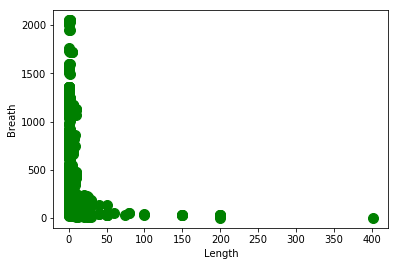

In [9]:
plt.scatter(X[:,0],X[:,1],s=100,c="green")
plt.xlabel("Length")
plt.ylabel("Breath")
plt.show()

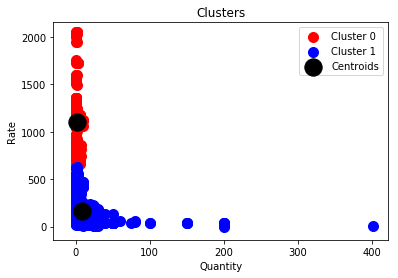

In [10]:
#visualization of three clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Quantity')
plt.ylabel('Rate')
plt.legend()
plt.show()

In [13]:
print("Inertia is", kmeans.inertia_)#Sum of squared distances of samples to their closest cluster center.

Inertia is 45316884.470192164


In [11]:
 #creating kmeans object from KMeans class and pass several parameters
    #n_cluster = number of clusters
    #init = (Random initialisation method)inorder to avoid random initialisation trap we use a method K-means++
    #max_iter = maximum number of iteration to find the final cluster
    #n_init  = number of times k means will run with different initial centroid
wcss = []    #finding out the number of clusters by within cluster sum of squares
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)          #fiiting the k means algorithm to our data x
    wcss.append(kmeans.inertia_) #compute Wcss and append it to the list Inertia computes the Wcss

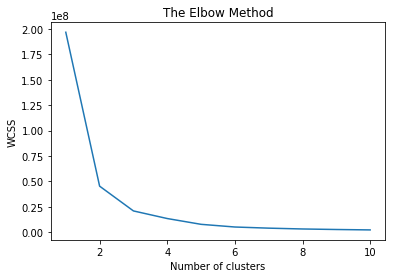

In [12]:

plt.plot(range(1, 11), wcss)  #plotting the Elbow method Graph
plt.title('The Elbow Method') #naming the title
plt.xlabel('Number of clusters')    #labeling x axis   
plt.ylabel('WCSS')          #labelling the y axis          
plt.show()            #Display the chart